In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import MultiTaskLasso, Lasso

In [2]:
rng = np.random.RandomState(42)

In [3]:
n_samples, n_features, n_tasks = 100,30, 40
n_relevant_features = 5

In [9]:
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))
    
X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X,Y).coef_

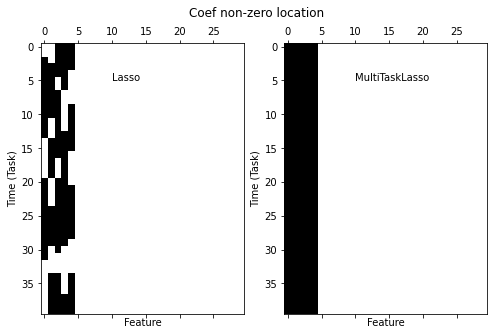

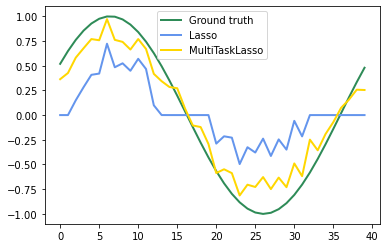

In [10]:
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (Task)')
plt.text(10, 5, 'MultiTaskLasso')
plt.suptitle('Coef non-zero location')
feature_to_plot = 0
plt.figure()
lw =2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
        label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue',
        linewidth=lw, label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold',
        linewidth=lw, label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()